# 1a

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

import seaborn
seaborn.set(style="white", context="notebook", font_scale=1.5,
            rc={"axes.grid": True, "legend.frameon": False,
"lines.markeredgewidth": 1.4, "lines.markersize": 10})

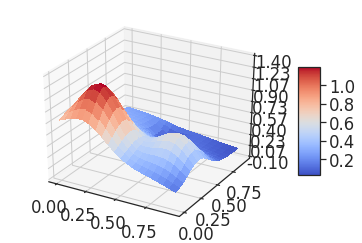

In [199]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, .05)#0.05)
y = np.arange(0, 1, .05)#0.05)

numberOfObservations = len(x)
xPlot, yPlot = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(xPlot, yPlot)

# Plot the surface.
surf = ax.plot_surface(xPlot, yPlot, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [201]:
class LeastSquares:
    """ 
    Least squares estimation of 2D function.
    Takes in meshgrid versions of x, y and z
    """
    
    def __init__(self, xPlot, yPlot, zPlot, degree):
        self.xPlot, self.yPlot, self.zPlot = xPlot, yPlot, zPlot
        self.x, self.y, self.z = xPlot.reshape(-1, 1), yPlot.reshape(-1, 1), zPlot.reshape(-1, 1)#z.reshape(-1, 1) 
        self.degree = degree
        
    def createDesignMatrix(self):
        x, y = self.x, self.y
        XHat = np.c_[x, y]
        polynomialDegree = self.degree
        poly = PolynomialFeatures(polynomialDegree)
        self.XHat = poly.fit_transform(XHat)
        return self.XHat

    def estimate(self):
        XHat = self.XHat
        self.betaHat = np.linalg.inv(XHat.T.dot(XHat)).dot(XHat.T).dot(z.reshape(-1,1))
        return self.betaHat
        
    def fit(self):
        XHat = self.XHat
        betaHat = self.betaHat
        self.zFit = XHat.dot(betaHat)
        return self.zFit
    
    def predict(self):
        XHat = self.XHat
        betaHat = self.betaHat
        self.zPredict = XHat.dot(betaHat)
        return self.zPredict
        
    def plot(self):
        xPlot, yPlot, zPlot = self.xPlot, self.yPlot, self.zPlot
        zPredict = self.zPredict
        #z = self.z
        zPredictPlot = np.reshape(zPredict, np.shape(zPlot))    

        # Plot
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        surf = ax.plot_surface(xPlot, yPlot, zPredictPlot/z, cmap=cm.coolwarm,
                               linewidth=0, antialiased=False)
        ax.set_zlim(-1.50, 25.0)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        fig.colorbar(surf, shrink=0.5, aspect=5)
        ax.set_title('Predict/True')
        plt.show()
        
    def calculateErrorScores(self):
        from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error
        z, zPredict= self.z, self.zPredict
        mse = mean_squared_error(z, zPredict)
        r2 = r2_score(z, zPredict)
        print("Mean squared error: %.4f" % mse)
        print('R2 score: %.4f' % r2)
        return mse, r2

    def calculateVarianceBeta(self):
        lambdaRidge = 0
        XHat = self.XHat
        betaHat = self.betaHat
        x, z = self.x, self.z

        # Source Ridge estimator variance: https://arxiv.org/pdf/1509.09169.pdf
        shapeXXT = np.shape(XHat.T.dot(XHat))

        yFitted = XHat.dot(betaHat)
        predictionError2 = 1/(len(x) -1)*np.sum((z - yFitted)**2)

        coefficientVariancesSLR = np.linalg.inv(XHat.T.dot(XHat)).dot(predictionError2)
        W = np.linalg.inv(XHat.T.dot(XHat) + lambdaRidge*np.eye(shapeXXT[0], shapeXXT[1])).dot(XHat.T).dot(XHat) 
        varBeta = W.dot(coefficientVariancesSLR).dot(W.T)
        #return varBeta

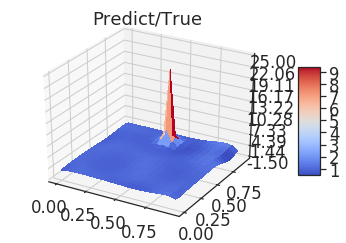

Mean squared error: 0.0022
R2 score: 0.9730


In [202]:
# Testing class

x = np.arange(0, 1, .05)#0.05)
y = np.arange(0, 1, .05)#0.05)

xPlot, yPlot = np.meshgrid(x,y)

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

zPlot = FrankeFunction(xPlot, yPlot)
degree = 5
ls = LeastSquares(xPlot, yPlot, zPlot, degree)
ls.createDesignMatrix()
ls.estimate()
ls.fit()
ls.predict()
ls.plot()
ls.calculateErrorScores()
ls.calculateVarianceBeta()

The plot above shows tha there is a huge difference between the predicted and the true solution in a small area of the domain. At most the predicted solution is approximately 20 times larger than the true solution. The error scores are very good. However, looking at the figure above, we see that low error scores are no guarantee for the fit being good over the whole domain.